In [1]:
import numpy as np
import goflow.init_ivp as gi
import goflow.models as gfm

In [7]:
# #initialize circuit+flow pattern
cfp={
    'type': 'hexagonal',
    'periods': 3,
    'source':'dipole_border',
    'plexus':'default',
}
flow=gfm.initialize_flow_on_crystal(cfp)
flow.circuit.nodes['label'] = [n for n in flow.circuit.G.nodes()]
flow.circuit.edges['label'] = [e for e in flow.circuit.G.edges()]

# set model and model parameters
mp={
    'alpha_0':1,
    'alpha_1':1.
}
murray=gfm.init(model='murray',pars=mp)

# initialize dynamic system and set integration parameters
morpheus=gi.morph_dynamic(flow=flow,model=murray)   
sp={
    't0': 0.,
    't1': 5.5,
    'x0': np.power(morpheus.flow.circuit.edges['conductivity']/morpheus.flow.circuit.scales['conductance'],0.25),
}

# plot initial network with data of choice
flow.circuit.draw_weight_scaling=2.
fig=flow.circuit.plot_circuit()
fig.show()

circuit(): initialized and ready for (some) action :)
set_source_landscape():  is set and consistent :)
set_plexus_landscape(): default is set and consistent :)


In [8]:
# numerically evaluate the system
nsol=morpheus.nsolve(murray.calc_update_stimuli,(sp['t0'],sp['t1']),sp['x0'], **murray.solver_options)
murray.jac=False
cost=[murray.calc_cost_stimuli(t,y,*murray.solver_options['args']) for t,y in zip(nsol.t,nsol.y.transpose())]

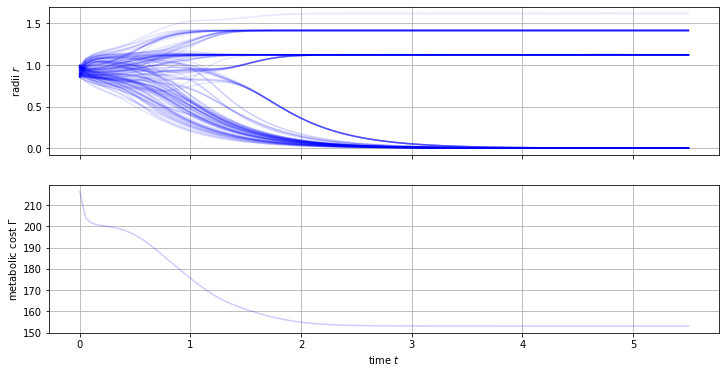

In [9]:
# # plot dynamic data such as radii and costs
import matplotlib.pyplot as plt
fig,axs=plt.subplots(2,1,figsize=(12,6),sharex=True)
axs[0].plot(nsol.t,nsol.y.transpose(),alpha=0.1,color='b')
axs[1].plot(nsol.t,cost,alpha=0.2,color='b')

for i in range(2):
    axs[i].grid(True)
    
axs[1].set_xlabel(r'time $t$')
axs[0].set_ylabel(r'radii $r$')
axs[1].set_ylabel(r'metabolic cost $\Gamma$')
plt.show()

In [10]:
# plot network with data of choice
flow.circuit.edges['conductivity']=nsol.y.transpose()[-1]*1.
flow.circuit.edges['flow_rate'], dP=flow.calc_configuration_flow()
flow.circuit.draw_weight_scaling=2.
fig=flow.circuit.plot_circuit(linewidth=[flow.circuit.edges['conductivity']])
fig.show()